In [40]:
# Import usual library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.dummy import DummyRegressor # (baseline score)
from sklearn.model_selection import train_test_split, cross_val_score


pd.options.mode.chained_assignment = None  # default='warn'

import itertools as it

In [41]:
# Read training dataset into df
df = pd.read_csv('./datasets/train.csv')

In [42]:
# View head
df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [43]:
# Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [44]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [45]:
# Create a dictionary to rename columns
col_name_dict = {'Id':'id', 'PID':'pid', 'MS SubClass':'ms_subclass', 'MS Zoning':'ms_zoning',
                 'Lot Frontage':'lot_frontage', 'Lot Area':'lot_area','Street':'street','Alley':'alley',
                 'Lot Shape':'lot_shape', 'Land Contour':'land_contour', 'Utilities':'utilities',
                 'Lot Config':'lot_config', 'Land Slope':'land_slope', 'Neighborhood':'neighborhood',
                 'Condition 1':'condition_1','Condition 2':'condition_2', 'Bldg Type':'building_type',
                 'House Style':'house_style', 'Overall Qual':'overall_quality','Overall Cond':'overall_condition',
                 'Year Built':'year_built', 'Year Remod/Add':'year_remodel_add', 'Roof Style':'roof_style',
                 'Roof Matl':'roof_material', 'Exterior 1st':'exterior_1', 'Exterior 2nd':'exterior_2',
                 'Mas Vnr Type':'masonry_type','Mas Vnr Area':'masonry_area', 'Exter Qual':'external_quality',
                 'Exter Cond':'external_condition', 'Foundation':'foundation', 'Bsmt Qual':'basement_quality',
                 'Bsmt Cond':'basement_condition', 'Bsmt Exposure':'basement_exposure',
                 'BsmtFin Type 1':'basement_fin_type_1', 'BsmtFin SF 1':'basement_fin_sf_1',
                 'BsmtFin Type 2':'basement_fin_type_2', 'BsmtFin SF 2':'basement_fin_sf_2',
                 'Bsmt Unf SF':'basement_unf_sf', 'Total Bsmt SF':'total_basement_sf','Heating':'heating',
                 'Heating QC':'heating_qc', 'Central Air':'central_air', 'Electrical':'electrical',
                 '1st Flr SF':'1st_floor_sf','2nd Flr SF':'2nd_floor_sf', 'Low Qual Fin SF':'low_quality_fin_sf',
                 'Gr Liv Area':'ground_living_area', 'Bsmt Full Bath':'basement_full_bath',
                 'Bsmt Half Bath':'basement_half_bath', 'Full Bath':'full_bath', 'Half Bath':'half_bath',
                 'Bedroom AbvGr':'bed_above_ground','Kitchen AbvGr':'kitchen_above_ground',
                 'Kitchen Qual':'kitchen_quality', 'TotRms AbvGrd':'total_rooms_above_ground', 
                 'Functional':'functional','Fireplaces':'fireplace', 'Fireplace Qu':'fireplace_quality',
                 'Garage Type':'garage_type', 'Garage Yr Blt':'garage_year_built','Garage Finish':'garage_fin',
                 'Garage Cars':'garage_cars', 'Garage Area':'garage_area', 'Garage Qual':'garage_quality',
                 'Garage Cond':'garage_condition', 'Paved Drive':'paved_drive', 'Wood Deck SF':'wood_deck_sf',
                 'Open Porch SF':'open_porch_df','Enclosed Porch':'enclosed_porch', '3Ssn Porch':'3ssn_porch',
                 'Screen Porch':'screen_porch', 'Pool Area':'pool_area', 'Pool QC':'pool_quality','Fence':'fence',
                 'Misc Feature':'misc_feature', 'Misc Val':'misc_value', 'Mo Sold':'month_sold',
                 'Yr Sold':'year_sold', 'Sale Type':'sale_type','SalePrice':'sale_price'}

In [46]:
# rename columns
df = df.rename(columns=col_name_dict)

In [47]:
df.shape

(2051, 81)

In [48]:
df.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_quality,fence,misc_feature,misc_value,month_sold,year_sold,sale_type,sale_price
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [49]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'building_type', 'house_style', 'overall_quality',
       'overall_condition', 'year_built', 'year_remodel_add', 'roof_style',
       'roof_material', 'exterior_1', 'exterior_2', 'masonry_type',
       'masonry_area', 'external_quality', 'external_condition', 'foundation',
       'basement_quality', 'basement_condition', 'basement_exposure',
       'basement_fin_type_1', 'basement_fin_sf_1', 'basement_fin_type_2',
       'basement_fin_sf_2', 'basement_unf_sf', 'total_basement_sf', 'heating',
       'heating_qc', 'central_air', 'electrical', '1st_floor_sf',
       '2nd_floor_sf', 'low_quality_fin_sf', 'ground_living_area',
       'basement_full_bath', 'basement_half_bath', 'full_bath', 'half_bath',
       'bed_above_ground', 'kitchen_above_ground', 'kitchen_q

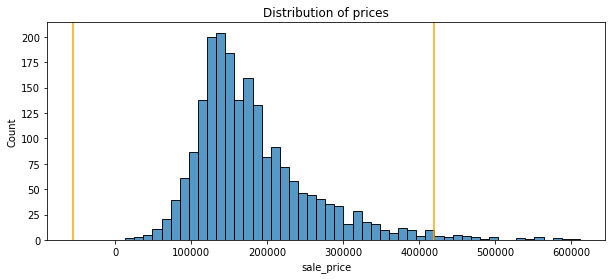

In [50]:
# Check for weird pricing

fig, ax = plt.subplots(figsize=(10,4))

# metrics
price_std = df['sale_price'].std()
price_mean = df['sale_price'].mean()
n = 3



# style
plt.title('Distribution of prices')




# plots
plt.axvline(price_mean + n * price_std, color = 'orange')
plt.axvline(price_mean - n * price_std, color = 'orange')
sns.histplot(df['sale_price'], bins=50);

In [51]:
# Grouping columns - consider using dictionary for this

# ID group probably won't be used
id_group = ['id', 'pid']
ms_group = ['ms_subclass', 'ms_zoning']

# Lot group - shape & area of land etc.
lot_group = ['lot_frontage', 'lot_area','lot_shape','lot_config']

# Location group - might help a little bit 
location_group = ['street', 'neighborhood','condition_1','condition_2']

# Land group - how slope the area is
land_group = ['land_contour','land_slope']

# Building group - different building types will cost differently
building_group = ['building_type','house_style','foundation']

# Overall group - overall condition might play a part in differentiating prices
overall_group = ['overall_quality','overall_condition']

# Year group - newer houses costs more this should be used
year_group = ['year_built','year_remodel_add']

# Exterior group - style of roofs, walls, etc - might only pick one
exterior_group = ['roof_style','roof_material','exterior_1','exterior_2','masonry_type','masonry_area',
                  'external_quality','external_condition']

# Basement group - could feature engineer to combine them all to 1-2 features
basement_group = ['basement_quality','basement_condition','basement_exposure','basement_fin_type_1',
                 'basement_fin_sf_1','basement_fin_sf_2','basement_fin_type_2','basement_unf_sf','total_basement_sf',
                 'basement_full_bath','basement_half_bath']

# Function group - some features might exist in more expensive houses e.g. central air
function_group = ['utilities','heating','heating_qc','central_air','electrical','functional','fireplace','fireplace_quality']

# Area group - feature engineer to combine total sf 
area_group = ['1st_floor_sf','2nd_floor_sf','ground_living_area']

# Baths - feature engineer to just bath
bath_group = ['full_bath','half_bath']

# Bed group - no. of bedrooms can leave as is
bed_group = ['bed_above_ground']

# Kitchen group - to explore
kitchen_group = ['kitchen_above_ground','kitchen_quality']

# Room group - probably can leave as is, more rooms should be more expensive
room_group = ['total_rooms_above_ground']

# Garage group - some garage types costs more than others
garage_group = ['garage_type','garage_year_built','garage_fin','garage_cars','garage_area','garage_quality',
                'garage_condition']

# Drive group - paved drive costs more, gotta check distribution
drive_group = ['paved_drive']

# This one can be dropped
unsure_group = ['low_quality_fin_sf']

# Porch group - can porbably select one or two eg. fence and something else
porch_group = ['wood_deck_sf', 'open_porch_df', 'enclosed_porch','3ssn_porch', 'screen_porch']

# Only a few houses have pools - might be better to leave out of the equation
pool_group = ['pool_area']

# Misc group - select one probably, or even leave out
misc_group = ['misc_value']

# Sold group - this one should be explored further, but year sold should play a part (maybe year built is better)
sold_group = ['month_sold', 'year_sold', 'sale_type']

# Target variable
target_var = ['sale_price']

In [52]:
# Create a list of column types
groups = [lot_group, location_group, land_group, building_group, overall_group, year_group, exterior_group,
         basement_group, function_group, area_group, bath_group, bed_group, kitchen_group, room_group,
         garage_group, drive_group, porch_group, pool_group, misc_group, sold_group]

In [53]:
# Check nulls
df.isnull().mean()[df.isnull().sum() > 0].sort_values(ascending=False)

pool_quality           0.995612
misc_feature           0.968308
alley                  0.931741
fence                  0.804973
fireplace_quality      0.487567
lot_frontage           0.160897
garage_year_built      0.055583
garage_condition       0.055583
garage_quality         0.055583
garage_fin             0.055583
garage_type            0.055095
basement_exposure      0.028279
basement_fin_type_2    0.027304
basement_condition     0.026816
basement_quality       0.026816
basement_fin_type_1    0.026816
masonry_area           0.010726
masonry_type           0.010726
basement_half_bath     0.000975
basement_full_bath     0.000975
total_basement_sf      0.000488
basement_unf_sf        0.000488
basement_fin_sf_2      0.000488
garage_cars            0.000488
garage_area            0.000488
basement_fin_sf_1      0.000488
dtype: float64

__Missing values findings:__

Mostly Empty - drop cols
- pool_quality mostly empty
- alley is mostly empty 
- misc_feature is mostly empty 
- fence is mostly empty 

Check
- fireplace_quality - check correlation with no fireplace

Check unit missing
- garage seems to be unit missing value
- basement seems to be unit missing value
- masonry seems to be unit missing value
- basement bath seems to be unit missing value

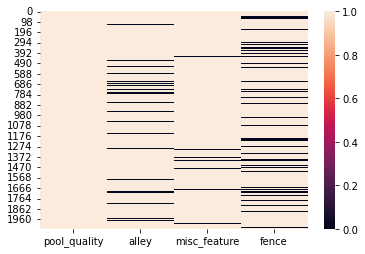

In [54]:
# Heatmap to visualize missing
sns.heatmap(df[['pool_quality','alley','misc_feature','fence']].isnull());

In [55]:
# Drop almost empty columns
df = df.drop(['pool_quality','alley','misc_feature','fence'], axis=1)

In [56]:
# Check 4 columns dropped from 81 to 77
df.shape

(2051, 77)

In [57]:
# Check fireplace quality
df[function_group].groupby(['fireplace','fireplace_quality'],dropna=False).count()

utilities  heating  heating_qc  central_air  \
fireplace fireplace_quality                                                
0         NaN                     1000     1000        1000         1000   
1         Ex                        29       29          29           29   
          Fa                        49       49          49           49   
          Gd                       447      447         447          447   
          Po                        31       31          31           31   
          TA                       342      342         342          342   
2         Ex                         2        2           2            2   
          Fa                         9        9           9            9   
          Gd                        74       74          74           74   
          TA                        61       61          61           61   
3         Fa                         1        1           1            1   
          Gd                         2        2           2            2   
          TA                         3        3           3            3   
4         TA                         1        1           1            1   

                             electrical  functional  
fireplace fireplace_quality                          
0         NaN                      1000        1000  
1         Ex                         29          29  
          Fa                         49          49  
          Gd                        447         447  
          Po                         31          31  
          TA                        342         342  
2         Ex                          2           2  
          Fa                          9           9  
          Gd                         74          74  
          TA                         61          61  
3         Fa                          1           1  
          Gd                          2           2  
          TA                          3           3  
4         TA                          1           1

In [58]:
# Every house with a fireplace always have fireplace quality, NaN is for places with no fireplace
# We can fillna with 'NA'

df['fireplace_quality'] = df['fireplace_quality'].fillna('NA')

In [59]:
# Checkout garage group

df[garage_group].groupby(['garage_type','garage_fin'],dropna=False).count()

# Let's keep it as is for now, will discuss what to do with it later

garage_year_built  garage_cars  garage_area  \
garage_type garage_fin                                                
2Types      Fin                         2            2            2   
            RFn                         4            4            4   
            Unf                        13           13           13   
Attchd      Fin                       395          395          395   
            RFn                       508          508          508   
            Unf                       310          310          310   
Basment     Fin                        10           10           10   
            RFn                         6            6            6   
            Unf                        11           11           11   
BuiltIn     Fin                        88           88           88   
            RFn                        37           37           37   
            Unf                         7            7            7   
CarPort     Unf                        11           11           11   
Detchd      Fin                        14           14           14   
            RFn                        24           24           24   
            Unf                       497          497          497   
            NaN                         0            0            0   
NaN         NaN                         0          113          113   

                        garage_quality  garage_condition  
garage_type garage_fin                                    
2Types      Fin                      2                 2  
            RFn                      4                 4  
            Unf                     13                13  
Attchd      Fin                    395               395  
            RFn                    508               508  
            Unf                    310               310  
Basment     Fin                     10                10  
            RFn                      6                 6  
            Unf                     11                11  
BuiltIn     Fin                     88                88  
            RFn                     37                37  
            Unf                      7                 7  
CarPort     Unf                     11                11  
Detchd      Fin                     14                14  
            RFn                     24                24  
            Unf                    497               497  
            NaN                      0                 0  
NaN         NaN                      0                 0

In [60]:
# Checkout basement group

df[basement_group].groupby(['basement_quality'],dropna=False).count()

# Basement can also keep for now since we might only select one column from these

,basement_condition,basement_exposure,basement_fin_type_1,basement_fin_sf_1,basement_fin_sf_2,basement_fin_type_2,basement_unf_sf,total_basement_sf,basement_full_bath,basement_half_bath
basement_quality,,,,,,,,,,
Ex,184,184,184,184,184,184,184,184,184,184
Fa,60,60,60,60,60,60,60,60,60,60
Gd,864,861,864,864,864,863,864,864,864,864
Po,1,1,1,1,1,1,1,1,1,1
TA,887,887,887,887,887,887,887,887,887,887
NaN,0,0,0,54,54,0,54,54,53,53


In [61]:
# Checkout exterior group

df[exterior_group].groupby(['masonry_type'],dropna=False).count()

# Exteriror might not play a big part in prediction, we'll leave it for now

,roof_style,roof_material,exterior_1,exterior_2,masonry_area,external_quality,external_condition
masonry_type,,,,,,,
BrkCmn,13,13,13,13,13,13,13
BrkFace,630,630,630,630,630,630,630
None,1218,1218,1218,1218,1218,1218,1218
Stone,168,168,168,168,168,168,168
NaN,22,22,22,22,0,22,22


In [62]:
# Checkout exterior group

df[df['lot_frontage'].isnull()][lot_group]

# Not sure why lot frontage is missing, let's keep it for now and see how it might impact the price

,lot_frontage,lot_area,lot_shape,lot_config
0,NaN,13517,IR1,CulDSac
7,NaN,12160,IR1,Inside
8,NaN,15783,Reg,Inside
23,NaN,7980,IR1,Inside
27,NaN,11700,IR1,Inside
...,...,...,...,...
2016,NaN,7791,IR1,Inside
2022,NaN,16381,IR1,Inside
2028,NaN,20781,IR2,CulDSac
2031,NaN,12537,IR1,CulDSac


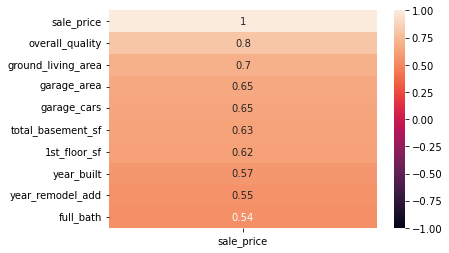

In [63]:
# Quick correlation check of numeric column - top 10 positively correlated

sns.heatmap(df.corr()[['sale_price']].sort_values('sale_price',ascending=False).head(10),
            annot=True,
            vmin=-1,
            vmax=1);

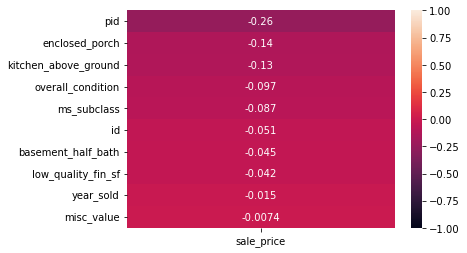

In [64]:
# Quick correlation check of numeric column - top 10 negatively correlated

sns.heatmap(df.corr()[['sale_price']].sort_values('sale_price',ascending=True).head(10),
            annot=True,
            vmin=-1,
            vmax=1);

### Create a function for iterator

In [65]:
def lr_metrics_all(models, df=df):
         
    selected_df = df[models]
    
    scores = {'r2_train':0, 'r2_test':0, 'cross_val':0, 'rmse_train':0, 'rmse_test':0}
    
    # select X and y
    X = selected_df.drop(columns=['sale_price'])
    y = selected_df['sale_price']
    
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    # instantiate, fit, and predict
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    
    # predict
    y_train_preds = lr.predict(X_train)
    y_test_preds = lr.predict(X_test)
    
    # train test score
    train_r2 = lr.score(X_train,y_train)
    test_r2 = lr.score(X_test,y_test)
    
    # cross validation score
    mean_cross_val = cross_val_score(lr, X_train, y_train).mean()
    
    # metrics (comparing y_preds with y)
    rmse_train = round(metrics.mean_squared_error(y_train,y_train_preds,squared=False),2)
    rmse_test = round(metrics.mean_squared_error(y_test,y_test_preds,squared=False),2)
    
    # compile into summary dictionary
    scores['r2_train'] = train_r2
    scores['r2_test'] = test_r2
    scores['cross_val'] = mean_cross_val
    scores['rmse_train'] = rmse_train
    scores['rmse_test'] = rmse_test
    
    return scores

---

### Baseline Model

In [66]:
# Clean up lot and investigate

# Create selected dataframe
cols = lot_group.append('sale_price')

selected_df = df[lot_group]

# Clean dataframe
selected_df['lot_frontage'].fillna(0,inplace=True)

# Dummy up
selected_df = pd.get_dummies(columns=['lot_shape','lot_config'], data = selected_df, drop_first=True)

# Check dataframe
selected_df

,lot_frontage,lot_area,sale_price,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside
0,0.0,13517,130500,0,0,0,1,0,0,0
1,43.0,11492,220000,0,0,0,1,0,0,0
2,68.0,7922,109000,0,0,1,0,0,0,1
3,73.0,9802,174000,0,0,1,0,0,0,1
4,82.0,14235,138500,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2046,79.0,11449,298751,0,0,0,0,0,0,1
2047,0.0,12342,82500,0,0,0,0,0,0,1
2048,57.0,7558,177000,0,0,1,0,0,0,1
2049,80.0,10400,144000,0,0,1,0,0,0,0


In [67]:
X = selected_df.drop(columns=['sale_price'])
y = selected_df['sale_price']

In [68]:
lr = LinearRegression()

In [69]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [70]:
lr.fit(X_train,y_train)

LinearRegression()

In [78]:
# predict
y_train_preds = lr.predict(X_train)
y_test_preds = lr.predict(X_test)

# train test score
train_r2 = lr.score(X_train,y_train)
test_r2 = lr.score(X_test,y_test)

# cross validation score
mean_cross_val = cross_val_score(lr, X_train, y_train).mean()

# metrics (comparing y_preds with y)
rmse_train = round(metrics.mean_squared_error(y_train,y_train_preds,squared=False),2)
rmse_test = round(metrics.mean_squared_error(y_test,y_test_preds,squared=False),2)

print(" Baseline Model ".center(30, "="))
print(f"train r2: {train_r2}")
print(f"teset_r2: {test_r2}")
print(f"mean cross val: {mean_cross_val}")
print(f"train rmse: {rmse_train}")
print(f"test rmse: {rmse_test}")

======= Baseline Model =======
train r2: 0.19115126091692702
teset_r2: 0.17360500406766477
mean cross val: 0.15864865075450893
train rmse: 71523.28
test rmse: 71232.62


---